In [155]:
import numpy as np
import anndata as ad
import scanpy as sc
import squidpy as sq
import scipy.io
import matplotlib.pyplot as plt
from pathlib import Path

## Loading the pseudo-3D Slide-seq dataset

In [220]:
puck_directory = Path("/work/magroup/shahula/spatiotemporal_transcriptomics_integration/data/slideseq/hippocampal_pseudo_3D/Puck_180531_13/")

In [226]:
# Load the counts and positions
counts_file = puck_directory / "MappedDGEForR.csv"
pos_file = puck_directory / "BeadLocationsForR.csv"

pos = pd.read_csv(pos_file, index_col=0)
counts = pd.read_csv(counts_file, index_col=0) # Takes a while, ~10min

# Align the indices
counts = counts.loc[:, pos.index]
barcodes = pos.index.values

# Swap position axes
# We swap x'=y and y'=-x to match the slides in the paper
pos = pd.DataFrame(
    {
        'X': pos.ycoord,
        'Y': pos.xcoord*-1,
    }, index=pos.index
)

num_umi = counts.sum(axis=0)

# Filter genes
gene_counts = (counts > 0).sum(axis=1)
valid_genes = gene_counts >= 50
counts = counts.loc[valid_genes]

In [241]:
counts

barcodes,AGTAGCCTGGCCT,CAAACGACTACGG,CATTCGAAATTTA,TTTTTTTTTTTTT,ATACTGAAGGGGG,CTTGATACCCCCC,CCCGTTAGAAAAA,CCATTTACCCCCC,GAGGAGACCCCCC,CATTCCACCCCCC,...,TGGTTTTTATGCG,ATCCCCTGCGCGC,AAGAGTTGCGCGC,CGAGAGTGCGCGC,AAACTATCGCGCG,CAATGCTCGCGCG,CTGCCCTCGCGCG,CGCTTCTCGCGCG,AACAGATATATAT,CACGGGTATATAT
Row,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009O20Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Tr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mt-Ts2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
mt-Tt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


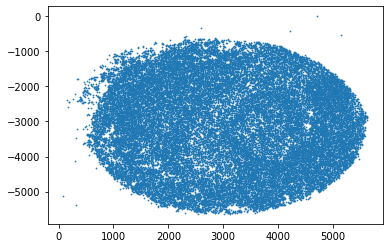

In [239]:
plt.scatter(*pos.T.values, s=0.5)

In [138]:
with h5py.File(filepath, 'r') as f:
#     refs = f["#refs#"].keys()
    print(f["UniqueMappedBeads"]["Barcodes"])

<HDF5 dataset "Barcodes": shape (32895, 1), type "|O">


In [107]:
import h5py
coordinates = []
with h5py.File(filepath, 'r') as f:
    print(f.keys())
    locations = f["Bead"]["Locations"]
    for index in range(len(locations)):
        print(index)
        h = f["Bead"]["Locations"][index]
        print(f[h[0]])
        coordinates.append(f[h[0]][()])
        pass
    
    g = f["Bead"]["Barcodes"][0][0]
    print(f[g][()])
#     print(f[h][()])

print(np.array(coordinates))

<KeysViewHDF5 ['#refs#', 'BaseBalanceMatrix', 'Bead', 'BeadImage', 'FlattenedBarcodes', 'Indices', 'NumZerosPlot']>
0
<HDF5 dataset "qqr": shape (1, 2), type "<f8">
1
<HDF5 dataset "rqr": shape (1, 2), type "<f8">
2
<HDF5 dataset "sqr": shape (1, 2), type "<f8">
3
<HDF5 dataset "tqr": shape (1, 2), type "<f8">
4
<HDF5 dataset "uqr": shape (1, 2), type "<f8">
5
<HDF5 dataset "vqr": shape (1, 2), type "<f8">
6
<HDF5 dataset "wqr": shape (1, 2), type "<f8">
7
<HDF5 dataset "xqr": shape (1, 2), type "<f8">
8
<HDF5 dataset "yqr": shape (1, 2), type "<f8">
9
<HDF5 dataset "zqr": shape (1, 2), type "<f8">
10
<HDF5 dataset "Aqr": shape (1, 2), type "<f8">
11
<HDF5 dataset "Bqr": shape (1, 2), type "<f8">
12
<HDF5 dataset "Cqr": shape (1, 2), type "<f8">
13
<HDF5 dataset "Dqr": shape (1, 2), type "<f8">
14
<HDF5 dataset "Eqr": shape (1, 2), type "<f8">
15
<HDF5 dataset "Fqr": shape (1, 2), type "<f8">
16
<HDF5 dataset "Gqr": shape (1, 2), type "<f8">
17
<HDF5 dataset "Hqr": shape (1, 2), type "

KeyboardInterrupt: 

In [121]:
with h5py.File(filepath, 'r') as f:
    print(f["FlattenedBarcodes"][()].sum(axis=1))
#     print(f[f["Bead"]["Pixels"][2][0]][()])

[2131118035921 2130117147197 2132679512209 ...         74348         71940
         65280]


In [88]:
coordinates

[array([[4680.22641509, 3705.69811321]]),
 array([[5132.73684211, 3501.07017544]]),
 array([[3827.45833333, 4287.17708333]]),
 array([[3912.        , 3670.40140845]]),
 array([[3562.88505747, 3227.29885057]]),
 array([[2480.63076923, 1493.93846154]]),
 array([[1936.24590164, 2540.81147541]]),
 array([[1092.5483871 , 3074.29032258]]),
 array([[1555.02, 1804.7 ]]),
 array([[4384.85714286, 1776.73015873]]),
 array([[3798.38983051, 4801.40677966]]),
 array([[5546.9673913 , 2528.98913043]])]

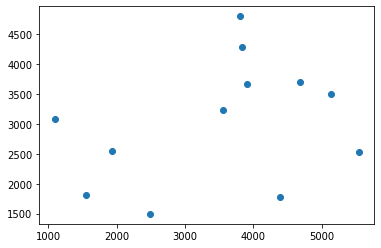

In [89]:
plt.scatter(*np.array(coordinates).T)

In [146]:
data = ad.read_h5ad("../../data/slideseq/hippocampal_pseudo_3D/slide_seq_sagittal_hippocampus.h5ad")

In [148]:
data.obs

,batch,puck_file,xcoord,ycoord
index,,,,
TCACGTAGAAACC-0,0,Puck_180528_20.h5ad,3091.012346,2471.888889
TCTCCTAGTTCGG-0,0,Puck_180528_20.h5ad,4375.917910,1577.529851
ACCGTCTGAATTC-0,0,Puck_180528_20.h5ad,3170.350746,5198.917910
TCCCTCAGAATGC-0,0,Puck_180528_20.h5ad,4126.090909,2013.597403
CAGTCTAGAATAG-0,0,Puck_180528_20.h5ad,3760.888889,3181.981481
...,...,...,...,...
AATGGGTCGCGCT-65,65,Puck_180620_5.h5ad,1309.962121,1714.257576
GGCGCTTTATGCG-65,65,Puck_180620_5.h5ad,2231.853333,953.253333
GGGTGCTCGCGCG-65,65,Puck_180620_5.h5ad,4666.300429,1735.630901


## Simulating realistic spatial patterns across FOVs

In [194]:
data_directory = Path("../../data/squidpy_datasets/")
adata = sq.datasets.merfish(data_directory)
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color="Cell_class")

  0%|          | 0.00/49.2M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
mouse_embryo = pd.read_csv("../../data/stereoseq/mouse_embryo_development/E10.5_E1S3_GEM_bin1.tsv", delimiter="\t", nrows=30000)

In [195]:
mouse_embryo

,geneID,x,y,MIDCounts
0,0610005C13Rik,3614,7988,1
1,0610005C13Rik,7811,8950,1
2,0610005C13Rik,7611,4790,1
3,0610005C13Rik,7478,3573,1
4,0610005C13Rik,5361,7425,1
...,...,...,...,...
29995,0610010K14Rik,7773,3124,1
29996,0610010K14Rik,5542,7198,1
29997,0610010K14Rik,6341,6955,1
29998,0610010K14Rik,8058,5567,1


In [199]:
mouse_embryo_slice = ad.read_h5ad("../../data/stereoseq/mouse_embryo_development/E16.5_E1S1.MOSTA.h5ad")

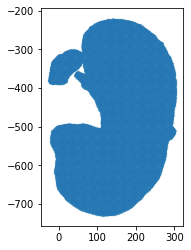

In [242]:
x, y = mouse_embryo_slice.obsm["spatial"][:].T
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
plt.scatter(x, y, s=0.01)

<AxesSubplot:xlabel='x', ylabel='y'>

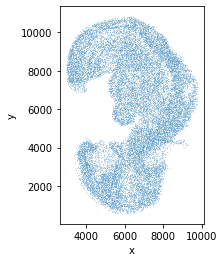

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
sns.scatterplot(data=mouse_embryo[["x", "y"]].astype(int), x="x", y="y", s=0.3)